## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

In [2]:
# read training data
df_train = pd.read_csv('Titanic_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


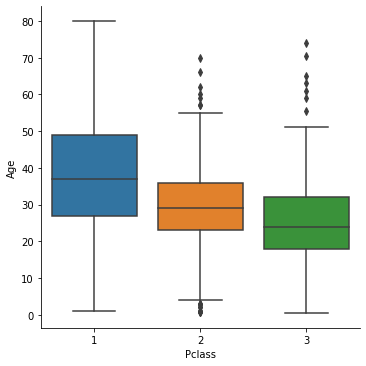

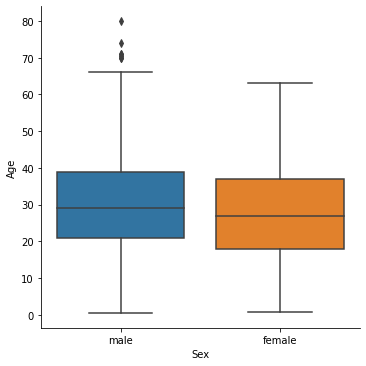

In [3]:
# check the stats
display(df_train.groupby(['Pclass'])['Age'].describe())
display(df_train.groupby(['Sex'])['Age'].describe())
sns.catplot(x = 'Pclass', y = 'Age', data = df_train, kind = 'box')
sns.catplot(x = 'Sex', y = 'Age', data = df_train, kind = 'box')

In [4]:
# display nan data in Age column
df_train[pd.isnull(df_train['Age']) == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [5]:
df_train_copy = df_train[['Pclass', 'Sex', 'Age']].copy() #copy needed columns to another object

# preprocess categorical data ('Sex') to discrete data: male =0, female = 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train_copy['Sex']=le.fit_transform(df_train_copy['Sex'])
display(df_train_copy)

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [6]:
# use sex and pclass data to caluclate distances between each data
from sklearn.metrics.pairwise import nan_euclidean_distances
nan_euclidean_distances(df_train_copy)
display(pd.DataFrame(nan_euclidean_distances(df_train_copy)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [7]:
# use KNN method to fill missing data
# set K value
# weights = distance
value_neighbors = 3
from sklearn.impute import KNNImputer
#Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors, weights = 'distance', add_indicator = True)
df_filled = pd.DataFrame(imputer.fit_transform(df_train_copy), columns = [*df_train_copy.columns, 'filled'])
display(df_filled[df_filled['filled'] == True])

,Pclass,Sex,Age,filled
5,3.0,1.0,19.666667,1.0
17,2.0,1.0,45.000000,1.0
19,3.0,0.0,19.000000,1.0
26,3.0,1.0,19.666667,1.0
28,3.0,0.0,19.000000,1.0
...,...,...,...,...
859,3.0,1.0,19.666667,1.0
863,3.0,0.0,19.000000,1.0
868,3.0,1.0,19.666667,1.0
878,3.0,1.0,19.666667,1.0


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1.0,216.0,38.015833,13.848257,0.92,29.0,36.0,47.25,80.0
2.0,184.0,30.640380,13.962737,0.67,23.0,30.0,39.25,70.0
3.0,491.0,23.567386,10.922441,0.42,19.0,20.0,29.00,74.0


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
0.0,314.0,27.200637,13.519508,0.75,19.000000,24.0,36.0,63.0
1.0,577.0,29.254483,13.797025,0.42,19.666667,27.0,36.0,80.0


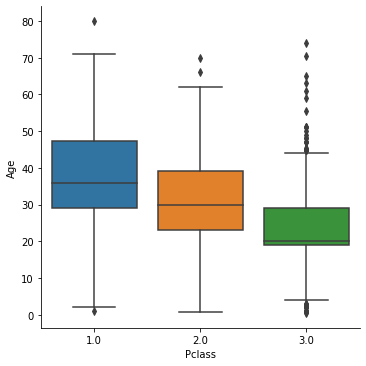

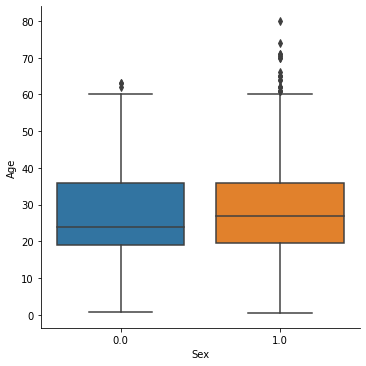

In [8]:
# recheck stats after filling data by KNN method
display(df_filled.groupby(['Pclass'])['Age'].describe())
display(df_filled.groupby(['Sex'])['Age'].describe())
sns.catplot(x = 'Pclass', y = 'Age', data = df_filled, kind = 'box')
sns.catplot(x = 'Sex', y = 'Age', data = df_filled, kind = 'box')